In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

In [20]:
movie_data = sc.textFile("data/ml-100k/u.item")
movie_data.take(2)

[u'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0',
 u'2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0']

In [33]:
#Method to convert dates into year and if it's improper, we will return 1900
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900

In [35]:
movie_fields = movie_data.map(lambda lines: lines.split("|"))
years = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))
years_filtered = years.filter(lambda x: x != 1900)
print years_filtered.count()
print years.count()

1681
1682


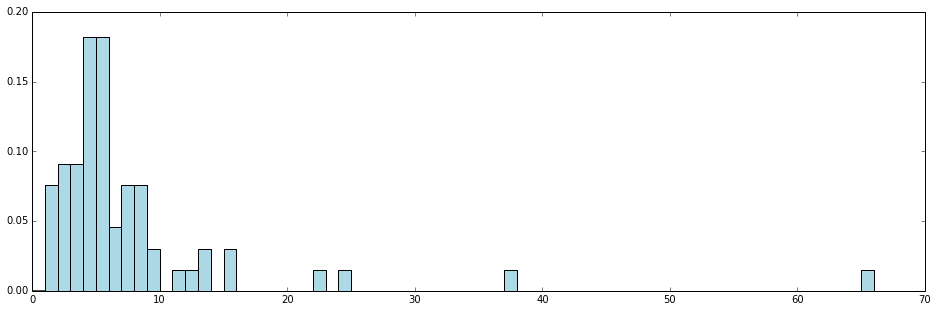

In [44]:
# As per the data set, current year is 1998, so the calculations are as per 1998
movie_ages = years_filtered.map(lambda yr: 1998-yr).countByValue()
values = movie_ages.values()
bins = movie_ages.keys()
hist(values, bins=bins, color='lightblue', normed=True)
fig = plt.gcf()
fig.set_size_inches(16, 5)